In [6]:
library(ggplot2)
library(reshape)
library(dplyr)
library(ggpubr)
library(viridis)

Warning message:
“package ‘viridis’ was built under R version 4.1.2”
Loading required package: viridisLite



## Summary of single-sample mosaic variant detection

### SNV VAF

In [3]:
DP = ""

data <- read.csv(paste("/data/project/MRS/5.Combined_Analysis/SENS_VAF/AUPRC_added/single_Perf_by_VAF.hc.snv.",DP,"auprc.txt",sep=""),header=FALSE,sep='\t')



vaf_vl <- subset(data, as.numeric(data$V11) <5)
vaf_l <- subset(data, as.numeric(data$V11) >=5 & as.numeric(data$V11) <10)
vaf_m <- subset(data, as.numeric(data$V11) >=10 & as.numeric(data$V11) <25)
vaf_h <- subset(data, as.numeric(data$V11) >=25 & as.numeric(data$V11) <100)
vaf_l

l_tool <- c("3.MF", "4.MT", "7.HC20", "12.HC200", "1.MH", "14.DM")
l_tool[1]
df_stat = data.frame()
for (i in 1:6){
    print (l_tool[i])
    data_f <- subset(data, data$V1 == l_tool[i])
    vaf_vl <- subset(data_f, as.numeric(data_f$V11) <5)
    vaf_l <- subset(data_f, as.numeric(data_f$V11) >=5 & as.numeric(data_f$V11) <10)
    vaf_m <- subset(data_f, as.numeric(data_f$V11) >=10 & as.numeric(data_f$V11) <25)
    vaf_h <- subset(data_f, as.numeric(data_f$V11) >=25 & as.numeric(data_f$V11) <100)
    median_vl <- (median(as.numeric(vaf_vl$V12), na.rm = T))
    median_l <- (median(as.numeric(vaf_l$V12), na.rm = T))
    median_m <- (median(as.numeric(vaf_m$V12), na.rm = T))
    median_h <- (median(as.numeric(vaf_h$V12), na.rm = T))
    df_stat <- rbind(df_stat, c(l_tool[i], median_vl, median_l, median_m, median_h))
}

colnames(df_stat) <- c("tool", 'vl', 'l', 'm', 'h')
df_stat
df_stat.melt <- melt(df_stat, id = "tool")
head(df_stat.melt)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12
,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
5,3.MF,"[4.0,7.5)",82391,74923,84,0.909359032,0.9988801,0.78007155,0.779197953,0.8392618107479907,7.5,0.9088719693178687
6,3.MF,"[7.5,9.6)",26470,24345,12,0.919720438,0.9995073,0.88965593,0.889217620,0.9042118555935225,9.6,0.919644659711042
13,1.MH,"[4.0,7.5)",82391,9702,0,0.117755580,1.0000000,1.00000000,1.000000000,0.21070005320708415,7.5,0.11774344285176779
14,1.MH,"[7.5,9.6)",26470,12202,0,0.460974688,1.0000000,1.00000000,1.000000000,0.6310508895324782,9.6,0.46093690970910467
21,14.DM,"[4.0,7.5)",82391,13486,79,0.163682927,0.9941762,0.40549125,0.403129741,0.23282985560353667,7.5,0.16313516049497384
22,14.DM,"[7.5,9.6)",26470,5453,20,0.206006800,0.9963457,0.52084126,0.518937952,0.2949321218021526,9.6,0.20548253437171632
29,4.MT,"[4.0,7.5)",82391,77144,106,0.936315860,0.9986278,0.74324942,0.742229556,0.8280518337434556,7.5,0.9354851516390381
30,4.MT,"[7.5,9.6)",26470,24983,16,0.943823196,0.9993600,0.86123265,0.860681435,0.900336955150729,9.6,0.9430834147149256
37,7.HC20,"[4.0,7.5)",82391,209,10,0.002536685,0.9543379,0.08002923,0.076374931,0.004910281636368976,7.5,0.002474035158767131


[1] "3.MF"

[1] "3.MF"
[1] "4.MT"
[1] "7.HC20"


Warning message in median(as.numeric(vaf_vl$V12), na.rm = T):
“NAs introduced by coercion”


[1] "12.HC200"


Warning message in median(as.numeric(vaf_vl$V12), na.rm = T):
“NAs introduced by coercion”


[1] "1.MH"


Warning message in median(as.numeric(vaf_vl$V12), na.rm = T):
“NAs introduced by coercion”


[1] "14.DM"


Warning message in median(as.numeric(vaf_vl$V12), na.rm = T):
“NAs introduced by coercion”


tool,vl,l,m,h
<chr>,<chr>,<chr>,<chr>,<chr>
3.MF,0.571052371773723,0.914258314514455,0.926348683605894,0.836015101802328
4.MT,0.7330202147153,0.939284283176982,0.948079555553791,0.418460361474726
7.HC20,0.000171688556957679,0.0828131532198325,0.510033713683262,0.48717933279268
12.HC200,0.00048645091138009,0.110761740085049,0.583747950567828,0.739479181254955
1.MH,0.00271840215182991,0.289340176280436,0.506962832205551,0.333947593150254
14.DM,0.0121605285651118,0.184308847433345,0.199011928318082,0.0295964981126907


,tool,variable,value
,<chr>,<fct>,<chr>
1,3.MF,vl,0.571052371773723
2,4.MT,vl,0.7330202147153
3,7.HC20,vl,0.000171688556957679
4,12.HC200,vl,0.00048645091138009
5,1.MH,vl,0.00271840215182991
6,14.DM,vl,0.0121605285651118


### INDEL VAF

In [5]:
DP = ""

data <- read.csv(paste("/data/project/MRS/5.Combined_Analysis/SENS_VAF/AUPRC_added/single_Perf_by_VAF.hc.ind.",DP,"auprc.txt",sep=""),header=FALSE,sep='\t')
data


l_tool <- c("3.MF", "4.MT", "7.HC20", "12.HC200")
l_tool[1]
df_stat_ind = data.frame()
for (i in 1:4){
    print (l_tool[i])
    data_f <- subset(data, data$V1 == l_tool[i])
    vaf_vl <- subset(data_f, as.numeric(data_f$V11) <5)
    vaf_l <- subset(data_f, as.numeric(data_f$V11) >=5 & as.numeric(data_f$V11) <10)
    vaf_m <- subset(data_f, as.numeric(data_f$V11) >=10 & as.numeric(data_f$V11) <25)
    vaf_h <- subset(data_f, as.numeric(data_f$V11) >=22 & as.numeric(data_f$V11) <100)
    median_vl <- (median(as.numeric(vaf_vl$V12), na.rm = T))
    median_l <- (median(as.numeric(vaf_l$V12), na.rm = T))
    median_m <- (median(as.numeric(vaf_m$V12), na.rm = T))
    median_h <- (median(as.numeric(vaf_h$V12), na.rm = T))
    df_stat_ind <- rbind(df_stat_ind, c(l_tool[i], median_vl, median_l, median_m, median_h))
}

colnames(df_stat_ind) <- c("tool", 'vl', 'l', 'm', 'h')
df_stat_ind
df_stat_ind.melt <- melt(df_stat_ind, id = "tool")
head(df_stat_ind.melt)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12
<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
3.MF,"[0,1.0)",407,13,486,0.031941032,0.0260521,0.01257396,0.0003275782,0.0006485055190313922,1.0,0.001109580899492217
3.MF,"[1.0,2.0)",1273,509,201,0.399842891,0.7169014,0.04197053,0.0300887352,0.055965954227766054,2.0,0.29785698451101766
3.MF,"[2.0,4.0)",1563,878,48,0.561740243,0.9481641,0.19306790,0.1830600637,0.27613362603078356,4.0,0.5218089984188539
3.MF,"[4.0,5.0)",1656,957,1,0.577898551,0.9989562,0.92236889,0.9214060830,0.7103015998485878,5.0,0.5770641663462887
3.MF,"[5.0,9.6)",1080,671,6,0.621296296,0.9911374,0.58322852,0.5780595806,0.5988985978096913,9.6,0.6021281851628933
3.MF,"[9.6,16.0)",1170,679,1,0.580341880,0.9985294,0.89399577,0.8926810670,0.7033973366206886,15.0,0.5752854914961375
3.MF,"[16.0,100.0)",1557,751,1,0.482337829,0.9986702,0.90316227,0.9019612553,0.6285491896234983,22.0,0.480553272795906
4.MT,"[0,1.0)",407,9,43,0.022113022,0.1730769,0.01477655,0.0025574793,0.00458471405393152,1.0,0.0037412083824123563
4.MT,"[1.0,2.0)",1273,496,148,0.389630793,0.7701863,0.05120360,0.0394363151,0.07162330761055404,2.0,0.2995400462325621


[1] "3.MF"

[1] "3.MF"
[1] "4.MT"
[1] "7.HC20"


Warning message in median(as.numeric(vaf_vl$V12), na.rm = T):
“NAs introduced by coercion”


[1] "12.HC200"


Warning message in median(as.numeric(vaf_vl$V12), na.rm = T):
“NAs introduced by coercion”


tool,vl,l,m,h
<chr>,<chr>,<chr>,<chr>,<chr>
3.MF,0.297856984511018,0.589596175754591,0.527919382146022,0.480553272795906
4.MT,0.299540046232562,0.58396374781227,0.523744534000904,0.401555355072412
7.HC20,0.00191938579654511,0.182379390864839,0.644181890660789,0.591178122503059
12.HC200,0.00423154457030938,0.19410204942906,0.709049781499083,0.665478293845116


,tool,variable,value
,<chr>,<fct>,<chr>
1,3.MF,vl,0.297856984511018
2,4.MT,vl,0.299540046232562
3,7.HC20,vl,0.00191938579654511
4,12.HC200,vl,0.00423154457030938
5,3.MF,l,0.589596175754591
6,4.MT,l,0.58396374781227


Warning message:
“Use of `df_stat_ind.melt$value` is discouraged. Use `value` instead.”
Saving 6.67 x 6.67 in image

Warning message:
“Use of `df_stat_ind.melt$value` is discouraged. Use `value` instead.”


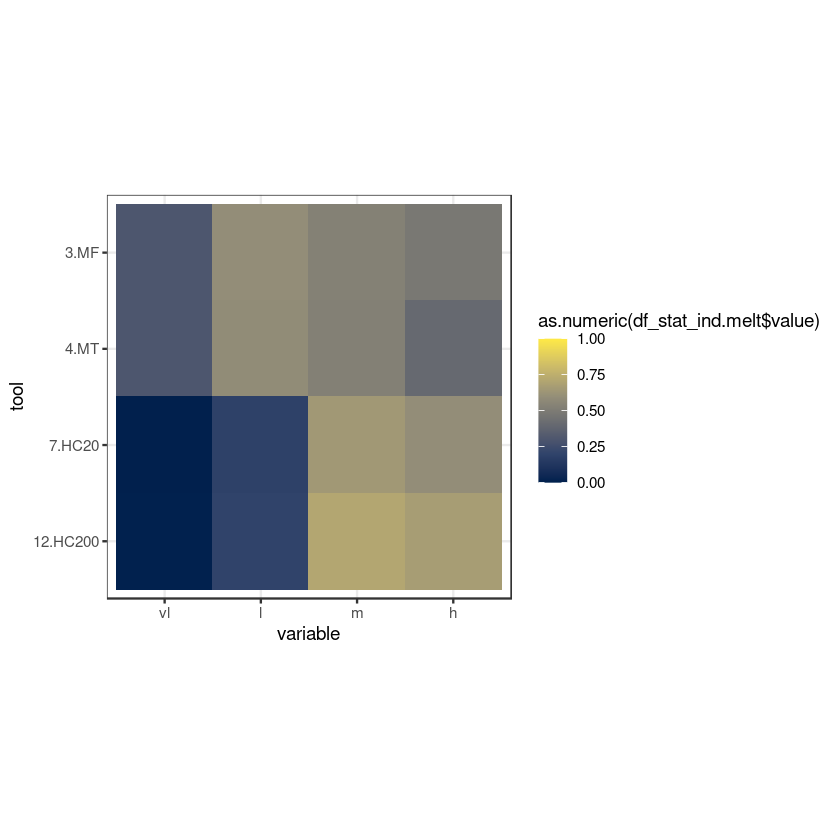

In [6]:
#df_stat.melt$tool <- factor(df_stat.melt$tool,levels=c('12.HC200', '7.HC20', "4.MT", "14.DM", "3.MF", "1.MH"))
#p_vaf_snv <- ggplot(data=df_stat.melt, aes(x=variable, y = tool)) +
#geom_tile(aes(fill=as.numeric(df_stat.melt$value))) + 
#  scale_fill_viridis_c(option = "cividis",direction = 1,limits = c(0, 1)) +
#theme_bw() + 
#theme(aspect.ratio = 1.5)

df_stat_ind.melt$tool <- factor(df_stat_ind.melt$tool,levels=c('12.HC200', '7.HC20', "4.MT",  "3.MF"))
p_vaf_ind <-  ggplot(data=df_stat_ind.melt, aes(x=variable, y = tool)) +
geom_tile(aes(fill=as.numeric(df_stat_ind.melt$value))) + 
  scale_fill_viridis_c(option = "cividis",direction = 1,limits = c(0, 1)) +
theme_bw() + 
theme(aspect.ratio = 1.0)

#p_vaf_snv 
p_vaf_ind


dir='/data/project/MRS/5.Combined_Analysis/BM_summary/'
#ggsave(paste(dir,"p_vaf_snv.pdf", sep=""), p_vaf_snv)
ggsave(paste(dir,"p_vaf_ind.pdf", sep=""), p_vaf_ind)

### SNV detection in different depths

In [7]:
DP = ""
l_tool <- c("3.MF", "4.MT", "7.HC20", "12.HC200", "1.MH", "14.DM")
df_stat = data.frame()
df_dp_mf = data.frame()
DP=paste("D",1, sep="")
#paste("/data/project/MRS/5.Combined_Analysis/SENS_VAF/AUPRC_added/single_Perf_by_VAF.hc.snv.",DP,".auprc.txt",sep="")
for (j in c(4,1,2,3)){
    DP <-  (paste("D",j, sep=""))
    data <- read.csv(paste("/data/project/MRS/5.Combined_Analysis/SENS_VAF/AUPRC_added/single_Perf_by_VAF.hc.snv.",DP,".auprc.txt",sep=""),header=FALSE,sep='\t')
    


    vaf_vl <- subset(data, as.numeric(V11) <5)
    vaf_l <- subset(data, as.numeric(V11) >=5 & as.numeric(V11) <10)
    vaf_vl_l <- subset(data, as.numeric(V11) <100 & V1 == '3.MF')
    vaf_m <- subset(data, as.numeric(V11) >=10 & as.numeric(V11) <25)
    vaf_h <- subset(data, as.numeric(V11) >=25 & as.numeric(V11) <100)
    #MF
    #print (vaf_vl_l)
    sum_ans = sum(vaf_vl_l$V3)
    sum_tp = sum(vaf_vl_l$V4)
    sum_fp = sum(vaf_vl_l$V5)
    df_dp_mf <- rbind(df_dp_mf, c('MF',DP, sum_ans, sum_tp, sum_fp))

    l_tool <- c("3.MF", "4.MT", "7.HC20", "12.HC200", "1.MH", "14.DM")
    l_tool[1]
    
    for (i in 1:6){

        data_f <- subset(data, data$V1 == l_tool[i])
        vaf_vl <- subset(data_f, as.numeric(V11) <5)
        vaf_l <- subset(data_f, as.numeric(V11) >=5 & as.numeric(V11) <10)
        vaf_m <- subset(data_f, as.numeric(V11) >=10 & as.numeric(V11) <25)
        vaf_h <- subset(data_f, as.numeric(V11) >=25 & as.numeric(V11) <100)
        median_vl <- (median(as.numeric(vaf_vl$V12), na.rm = T))
        median_l <- (median(as.numeric(vaf_l$V12), na.rm = T))
        median_m <- (median(as.numeric(vaf_m$V12), na.rm = T))
        median_h <- (median(as.numeric(vaf_h$V12), na.rm = T))
        df_stat <- rbind(df_stat, c(l_tool[i],DP, median_vl, median_l, median_m, median_h))
        
}
}

df_dp_mf

colnames(df_stat) <- c("tool", 'dp','vl', 'l', 'm', 'h')
df_stat$vl = as.numeric(df_stat$vl)
df_stat$l = as.numeric(df_stat$l)
df_stat$m = as.numeric(df_stat$m)
df_stat$h = as.numeric(df_stat$h)

df_stat <- df_stat %>% 
  rowwise() %>% 
  mutate(median = median(c(vl,l,m,h)))

 
df_stat<- df_stat[,c("tool", "dp", "median")] #(df_stat, df_stat$variable=='median')
df_stat
#df_stat.melt <- melt(df_stat, id.vars = c("tool", "dp"),)
#df_stat.melt
#df_stat.melt <- subset(df_stat.melt, df_stat.melt$variable=='median')
#head(df_stat.melt)
#df_stat.melt

Warning message in median(as.numeric(vaf_vl$V12), na.rm = T):
“NAs introduced by coercion”
Warning message in median(as.numeric(vaf_vl$V12), na.rm = T):
“NAs introduced by coercion”
Warning message in median(as.numeric(vaf_vl$V12), na.rm = T):
“NAs introduced by coercion”
Warning message in median(as.numeric(vaf_vl$V12), na.rm = T):
“NAs introduced by coercion”
Warning message in median(as.numeric(vaf_vl$V12), na.rm = T):
“NAs introduced by coercion”
Warning message in median(as.numeric(vaf_vl$V12), na.rm = T):
“NAs introduced by coercion”
Warning message in median(as.numeric(vaf_vl$V12), na.rm = T):
“NAs introduced by coercion”
Warning message in median(as.numeric(vaf_vl$V12), na.rm = T):
“NAs introduced by coercion”
Warning message in median(as.numeric(vaf_vl$V12), na.rm = T):
“NAs introduced by coercion”
Warning message in median(as.numeric(vaf_vl$V12), na.rm = T):
“NAs introduced by coercion”


X.MF.,X.D4.,X.345552.,X.263435.,X.918.
<chr>,<chr>,<chr>,<chr>,<chr>
MF,D4,345552,263435,918
MF,D1,345552,174345,4541
MF,D2,345552,223276,2299
MF,D3,345552,257889,1334


tool,dp,median
<chr>,<chr>,<dbl>
3.MF,D4,0.87513671
4.MT,D4,0.83615225
7.HC20,D4,0.28499624
12.HC200,D4,0.34725485
1.MH,D4,0.31164388
14.DM,D4,0.10695267
3.MF,D1,0.60405437
4.MT,D1,0.55132524
7.HC20,D1,0.18180933


In [3]:
colnames(df_dp_mf) <- c("tool", "DP", "ans", "tp", "fp")
df_dp_mf$ans = as.numeric(df_dp_mf$ans)
df_dp_mf$tp = as.numeric(df_dp_mf$tp)
df_dp_mf$fp = as.numeric(df_dp_mf$fp)

df_dp_mf$cof <- (df_dp_mf$tp + df_dp_mf$fp)/(df_dp_mf$tp + 252.75*df_dp_mf$fp)
df_dp_mf$sen <- df_dp_mf$tp/df_dp_mf$ans
df_dp_mf$pre <- df_dp_mf$tp/(df_dp_mf$tp + df_dp_mf$fp)
df_dp_mf$Wpre <- df_dp_mf$pre * df_dp_mf$cof
#df_dp_mf$Fscore <- MF	
#D4	239872	169556	911	0.42636869	0.42636869	0.7068603	0.9946559	0.42409012
#MF	D1	239872	98750	3948	0.09365069	0.09365069	0.4116779	0.9615572	0.09005049
#MF	D2	239872	136578	2173	0.20231881	0.20231881	0.5693787	0.9843389	0.19915027
#MF	D3	239872	164049	1317	0.33278143	0.33278143	0.6839022	0.9920358	0.33013111


df_dp_mf

tool,DP,ans,tp,fp,cof,sen,pre,Wpre
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MF,D4,345552,263435,918,0.5335512,0.7623599,0.9965274,0.5316984
MF,D1,345552,174345,4541,0.1353062,0.5045406,0.9746151,0.1318715
MF,D2,345552,223276,2299,0.2804444,0.6461430,0.9898083,0.2775862
MF,D3,345552,257889,1334,0.4356268,0.7463103,0.9948539,0.4333850


[1] 3.MF     4.MT     7.HC20   12.HC200 1.MH     14.DM    3.MF     4.MT    
 [9] 7.HC20   12.HC200 1.MH     14.DM    3.MF     4.MT     7.HC20   12.HC200
[17] 1.MH     14.DM    3.MF     4.MT     7.HC20   12.HC200 1.MH     14.DM   
Levels: 12.HC200 7.HC20 4.MT 14.DM 3.MF 1.MH

[1] 3.MF     4.MT     7.HC20   12.HC200 1.MH     14.DM    3.MF     4.MT    
 [9] 7.HC20   12.HC200 1.MH     14.DM    3.MF     4.MT     7.HC20   12.HC200
[17] 1.MH     14.DM    3.MF     4.MT     7.HC20   12.HC200 1.MH     14.DM   
Levels: 12.HC200 7.HC20 4.MT 14.DM 3.MF 1.MH

png 
  2

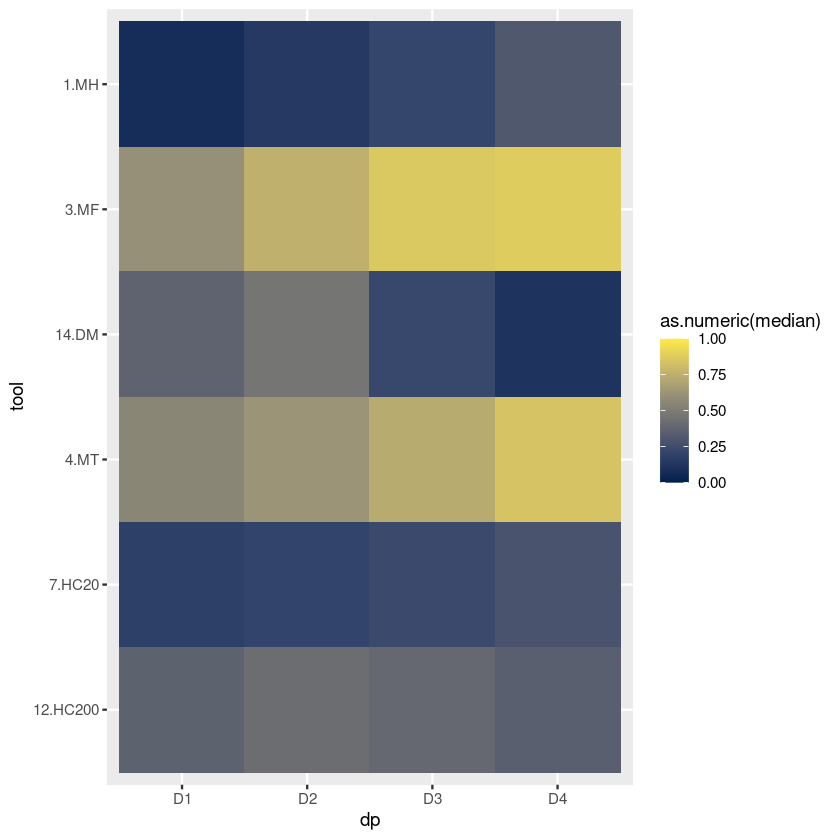

In [32]:

p_vaf_dp <- df_stat$tool <- factor(df_stat$tool,levels=c('12.HC200', '7.HC20', "4.MT", "14.DM", "3.MF", "1.MH"))
ggplot(data=df_stat, aes(x=dp, y = tool)) +
geom_tile(aes(fill=as.numeric(median))) + 
  scale_fill_viridis_c(option = "cividis",direction = 1,limits = c(0, 1))
p_vaf_dp
pdf("p_vaf_dp.pdf")
p_vaf_dp
dev.off()

### Cosistency

In [3]:

l_tool <- c("MF", "MT", "HC20", "HC200", "MH", "DM")
df_stat = data.frame()

for (i in 1:6){
    print (l_tool[i])
    data <- read.csv(paste("/data/project/MRS/5.Combined_Analysis/Consistency/Fig2/SNV/",l_tool[i],".bydepth.tp.TP.txt",sep=""),header=TRUE,sep='\t')
    cnt_union <- sum(data$CT)
    cnt_uniq <- sum(subset(data, data$COMB== 'ND'| data$COMB == 'D1' | data$COMB == 'D2' | data$COMB == 'D3')$CT)
    tp_consist <- 1- cnt_uniq/cnt_union
    data <- read.csv(paste("/data/project/MRS/5.Combined_Analysis/Consistency/Fig2/SNV/",l_tool[i],".bydepth.mx.FP.txt",sep=""),header=TRUE,sep='\t')
    cnt_union <- sum(data$CT)
    cnt_uniq <- sum(subset(data, data$COMB== 'ND'| data$COMB == 'D1' | data$COMB == 'D2' | data$COMB == 'D3')$CT)
    fp_nonv_consist <- 1- cnt_uniq/cnt_union
    data <- read.csv(paste("/data/project/MRS/5.Combined_Analysis/Consistency/Fig2/SNV/",l_tool[i],".bydepth.tp.FP.txt",sep=""),header=TRUE,sep='\t')
    cnt_union <- sum(data$CT)
    cnt_uniq <- sum(subset(data, data$COMB== 'ND'| data$COMB == 'D1' | data$COMB == 'D2' | data$COMB == 'D3')$CT)
    fp_germ_consist <- 1- cnt_uniq/cnt_union
    print (tp_consist) #, fp_nonv_consist, fp_germ_consist)
    df_stat <- rbind(df_stat, c(l_tool[i], tp_consist, fp_nonv_consist, fp_germ_consist))
}




colnames(df_stat) <- c("tool", 'tp','fp_nonv', 'fp_germ')

df_stat
df_stat.melt <- melt(df_stat, id.vars = c("tool"))
df_stat.melt

[1] "MF"
[1] 0.7745964
[1] "MT"
[1] 0.7829743
[1] "HC20"
[1] 0.5152213
[1] "HC200"
[1] 0.4203276
[1] "MH"
[1] 0.4493281
[1] "DM"
[1] 0.4996007


tool,tp,fp_nonv,fp_germ
<chr>,<chr>,<chr>,<chr>
MF,0.774596371126526,0.0769127696636741,NaN
MT,0.78297427732723,0.0931098696461825,0.997978875994263
HC20,0.515221331367309,0.035366931918656,0.996833550293776
HC200,0.420327557345157,0.0142513348875686,0.997813590134133
MH,0.449328056608259,0,0
DM,0.499600700991592,0.0942570177697657,0


tool,variable,value
<chr>,<fct>,<chr>
MF,tp,0.774596371126526
MT,tp,0.78297427732723
HC20,tp,0.515221331367309
HC200,tp,0.420327557345157
MH,tp,0.449328056608259
DM,tp,0.499600700991592
MF,fp_nonv,0.0769127696636741
MT,fp_nonv,0.0931098696461825
HC20,fp_nonv,0.035366931918656


Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



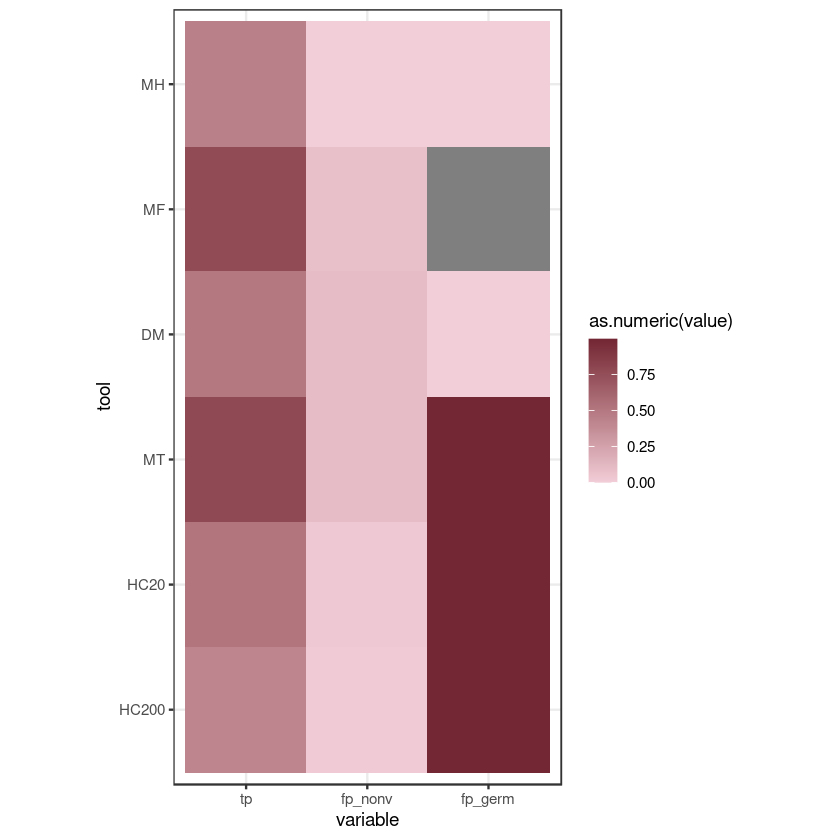

In [8]:
vir_8 <- viridis(n = 8)
df_stat.melt$tool <- factor(df_stat.melt$tool,levels=c('HC200', 'HC20', "MT", "DM", "MF", "MH"))
p_cons <- ggplot(data=df_stat.melt, aes(x=variable, y = tool)) +
geom_tile(aes(fill=as.numeric(value))) + 
  scale_fill_continuous(limits = c(0, 1)) +
    scale_fill_gradient(low = "#F2CED8", high="#732634") + 
theme_bw() + 
theme(aspect.ratio = 2)
p_cons

# Summary of paired-sample mosaic variant detection


### sample-specific SNV performance acorss VAFs

In [1]:
DP = ""

data <- read.csv(paste("/data/project/MRS/5.Combined_Analysis/Samplespecific/sample_specific_Perf_by_VAF.hc.snv.vaf10.",DP,"auprc.txt",sep=""),header=FALSE,sep='\t')

data



l_tool <- c("3.MF", "4.MT", "7.HC20", "12.HC200", "1.MH", "14.DM", "16.STK", "17.MT_PD", "13.MSM")
l_tool[1]
df_all <- data.frame()
df_stat = data.frame()
for (i in 1:9){
    print (l_tool[i])
    data_f <- subset(data, data$V1 == l_tool[i])
    vaf_vl <- subset(data_f, as.numeric(data_f$V11) <5)
    vaf_l <- subset(data_f, as.numeric(data_f$V11) >=5 & as.numeric(data_f$V11) <13)
    vaf_vl_l <- subset(data_f, as.numeric(data_f$V11) <5)
    vaf_m <- subset(data_f, as.numeric(data_f$V11) >=13 & as.numeric(data_f$V11) <26)
    vaf_h <- subset(data_f, as.numeric(data_f$V11) >=25 & as.numeric(data_f$V11) <100)
    median_vl <- (median(as.numeric(vaf_vl$V12), na.rm = T))
    median_l <- (median(as.numeric(vaf_l$V12), na.rm = T))
    median_m <- (median(as.numeric(vaf_m$V12), na.rm = T))
    median_h <- (median(as.numeric(vaf_h$V12), na.rm = T))
    df_stat <- rbind(df_stat, c(l_tool[i], median_vl, median_l, median_m, median_h))
    data_f <- subset(data_f, as.numeric(data_f$V11) <11)
    sum_ans = sum(data_f$V3)
    sum_tp = sum(data_f$V4)
    sum_fp = sum(data_f$V5)
    df_all <- rbind(df_all, c(l_tool[i], sum_ans, sum_tp, sum_fp))
    
}

colnames(df_stat) <- c("tool", 'vl', 'l', 'm', 'h')
df_stat
df_stat.melt <- melt(df_stat, id = "tool")
head(df_stat.melt)
df_stat.melt$tool <- factor(df_stat.melt$tool,levels=c('13.MSM','12.HC200', '7.HC20', '16.STK', '17.MT_PD',"4.MT", "14.DM", "3.MF", "1.MH"))
p_vaf_snv <- ggplot(data=df_stat.melt, aes(x=variable, y = tool)) +
geom_tile(aes(fill=as.numeric(value))) + 
  scale_fill_viridis_c(option = "cividis",direction = 1,limits = c(0, 1)) +
theme_bw() + 
theme(aspect.ratio = 1.5)



p_vaf_snv 



dir='/data/project/MRS/5.Combined_Analysis/BM_summary/'
ggsave(paste(dir,"p_vaf_snv_ss.pdf", sep=""), p_vaf_snv)


V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12
<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
3.MF,"[0,1)",312498,3222,7235,1.031047e-02,0.3081190,0.00570838,0.001758860,0.0030050836698255253,1,3.636093e-04
3.MF,"[1,2)",997650,358812,6050,3.596572e-01,0.9834184,0.19325835,0.190053812,0.24869147641590594,2,7.221357e-02
3.MF,"[2,3)",731070,580812,1381,7.944684e-01,0.9976279,0.62610840,0.624623229,0.6993817769836442,3,4.711451e-01
3.MF,"[3,4)",515430,440460,1237,8.545486e-01,0.9971994,0.58649596,0.584853443,0.694435165417299,4,5.373121e-01
3.MF,"[4,10)",886302,811410,1865,9.155006e-01,0.9977068,0.63398981,0.632535950,0.7481568025680807,10,7.600932e-01
3.MF,"[10,15)",103410,95805,91,9.264578e-01,0.9990511,0.80716972,0.806403757,0.8622720537856875,15,9.215563e-01
3.MF,"[15,25)",121230,112860,0,9.309577e-01,1.0000000,1.00000000,1.000000000,0.964244521337947,25,9.309494e-01
3.MF,"[25,100)",223110,184473,0,8.268253e-01,1.0000000,1.00000000,1.000000000,0.9052045840969815,32,8.268209e-01
1.MH,"[0,1)",312498,0,0,0.000000e+00,0.0000000,0.00000000,0.000000000,null,1,0.000000e+00


[1] "3.MF"

[1] "3.MF"
[1] "4.MT"
[1] "7.HC20"
[1] "12.HC200"
[1] "1.MH"
[1] "14.DM"
[1] "16.STK"
[1] "17.MT_PD"
[1] "13.MSM"


tool,vl,l,m,h
<chr>,<chr>,<chr>,<chr>,<chr>
3.MF,0.271679345896463,0.760093233521318,0.926252872069901,0.878885142829896
4.MT,0.62594965711662,0.885761073080868,0.939459899605496,0.754908927510003
7.HC20,0.00010632187413165,0.00657067366716879,0.670299332524371,0.930907266882944
12.HC200,0.000313926080345194,0.000465007813614326,0.527889081548478,0.895461032915293
1.MH,0.0014098628514668,0.196425146281967,0.539375534797912,0.457261245222885
14.DM,0.000711211057961726,0.0578166499005175,0.135645785770742,0.0905327825155762
16.STK,0.57882495542564,0.943803276511872,0.995710696416949,0.997717192273637
17.MT_PD,0.422858642583904,0.912056507952174,0.961380194205729,0.97002309958797
13.MSM,0.457509247169574,0.874096475915172,0.965267180015289,0.991370514882133


ERROR: Error in melt(df_stat, id = "tool"): could not find function "melt"


In [11]:
df_all
df_all

colnames(df_all) <- c("tool",  "ans", "tp", "fp")
df_dp_mf <- df_all
df_dp_mf$ans = as.numeric(df_dp_mf$ans)
df_dp_mf$tp = as.numeric(df_dp_mf$tp)
df_dp_mf$fp = as.numeric(df_dp_mf$fp)

df_dp_mf$cof <- (df_dp_mf$tp + df_dp_mf$fp)/(df_dp_mf$tp + 252.75*df_dp_mf$fp)
df_dp_mf$sen <- df_dp_mf$tp/df_dp_mf$ans
df_dp_mf$pre <- df_dp_mf$tp/(df_dp_mf$tp + df_dp_mf$fp)
df_dp_mf$Wpre <- df_dp_mf$pre * df_dp_mf$cof
df_dp_mf

X.3.MF.,X.6885900.,X.4389432.,X.35536.
<chr>,<chr>,<chr>,<chr>
3.MF,6885900,4389432,35536
4.MT,6885900,5118180,34296
7.HC20,6885900,32490,642
12.HC200,6885900,54294,14600
1.MH,6885900,397686,0
14.DM,6885900,407910,6392
16.STK,6885900,4935996,29916
17.MT_PD,6885900,4965306,13974
13.MSM,6885900,4772630,8084


X.3.MF.,X.6885900.,X.4389432.,X.35536.
<chr>,<chr>,<chr>,<chr>
3.MF,6885900,4389432,35536
4.MT,6885900,5118180,34296
7.HC20,6885900,32490,642
12.HC200,6885900,54294,14600
1.MH,6885900,397686,0
14.DM,6885900,407910,6392
16.STK,6885900,4935996,29916
17.MT_PD,6885900,4965306,13974
13.MSM,6885900,4772630,8084


tool,ans,tp,fp,cof,sen,pre,Wpre
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3.MF,6885900,4389432,35536,0.33093384,0.637452185,0.9919692,0.32827618
4.MT,6885900,5118180,34296,0.37373360,0.743284102,0.9933438,0.37124595
7.HC20,6885900,32490,642,0.17012100,0.004718337,0.9806230,0.16682456
12.HC200,6885900,54294,14600,0.01839899,0.007884808,0.7880802,0.01449988
1.MH,6885900,397686,0,1.00000000,0.057753671,1.0000000,1.00000000
14.DM,6885900,407910,6392,0.20474646,0.059238444,0.9845716,0.20158756
16.STK,6885900,4935996,29916,0.39735990,0.716826559,0.9939757,0.39496610
17.MT_PD,6885900,4965306,13974,0.58598830,0.721083083,0.9971936,0.58434377
13.MSM,6885900,4772630,8084,0.70141014,0.693101846,0.9983090,0.70022408


### shared SNV performance acorss VAFs

In [14]:
data <- read.csv("/data/project/MRS/5.Combined_Analysis/SharedVAF/3grade_f.txt",header=FALSE,sep='\t')

data



l_tool <- c("3.MF", "4.MT", "7.HC20", "12.HC200", "1.MH", "14.DM", "16.STK", "17.MT_PD", "13.MSM", "2.MH_P", '5.MT_P')
df_stat = data.frame()
df_all = data.frame()
for (i in 1:11){
    print (l_tool[i])
    data_f <- subset(data, data$V1 == l_tool[i])
    
    vaf_vl <- subset(data_f, data_f$V2 ==0)
    print (vaf_vl)
    vaf_l <- subset(data_f, data_f$V2 ==1)
    vaf_m <- subset(data_f, data_f$V2 ==2)
    vaf_h <- subset(data_f, data_f$V2 ==3)
    median_vl <- (median(as.numeric(vaf_vl$V11), na.rm = T))
    median_l <- (median(as.numeric(vaf_l$V11), na.rm = T))
    median_m <- (median(as.numeric(vaf_m$V11), na.rm = T))
    median_h <- (median(as.numeric(vaf_h$V11), na.rm = T))

    sum_ans <- sum(data_f$V4)
    sum_tp <- sum(data_f$V9)
    sum_fp <- sum(data_f$V10)
    df_all<- rbind(df_all, c(l_tool[i], sum_ans, sum_tp, sum_fp))
    df_stat <- rbind(df_stat, c(l_tool[i], median_vl, median_l, median_m, median_h))
}

colnames(df_stat) <- c("tool", 'vl', 'l', 'm', 'h')
df_stat
df_all
df_stat.melt <- melt(df_stat, id = "tool")
head(df_stat.melt)
df_stat.melt$tool <- factor(df_stat.melt$tool,levels=c('13.MSM','12.HC200', '7.HC20', '16.STK', '5.MT_P','17.MT_PD',"4.MT", "14.DM", "3.MF", '2.MH_P',"1.MH"))
p_vaf_snv <- ggplot(data=df_stat.melt, aes(x=variable, y = tool)) +
geom_tile(aes(fill=as.numeric(value))) + 
  scale_fill_viridis_c(option = "cividis",direction = 1,limits = c(0, 1)) +
theme_bw() + 
theme(aspect.ratio = 2)



p_vaf_snv 



dir='/data/project/MRS/5.Combined_Analysis/BM_summary/'
ggsave(paste(dir,"p_vaf_snv_sha.pdf", sep=""), p_vaf_snv)


V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.MH,0,0,120864,0.002581,1.0000000,1.000000000,1.0000000000,312,0,0.0051487112
1.MH,0,1,105756,0.034126,1.0000000,1.000000000,1.0000000000,3609,0,0.0659996944
1.MH,0,3,90648,0.013801,1.0000000,1.000000000,1.0000000000,1251,0,0.0272262505
1.MH,1,0,224274,0.088423,1.0000000,1.000000000,1.0000000000,19831,0,0.1624791097
1.MH,1,1,214734,0.313630,1.0000000,1.000000000,1.0000000000,67347,0,0.4775012751
1.MH,1,2,4872,0.371716,1.0000000,1.000000000,1.0000000000,1811,0,0.5419722450
1.MH,1,3,94824,0.156300,1.0000000,1.000000000,1.0000000000,14821,0,0.2703450662
1.MH,2,0,103410,0.193357,1.0000000,1.000000000,1.0000000000,19995,0,0.3240555844
1.MH,2,1,120858,0.358313,1.0000000,1.000000000,1.0000000000,43305,0,0.5275853209


[1] "3.MF"
      V1 V2 V3     V4       V5        V6        V7        V8     V9 V10
110 3.MF  0  0 120864 0.856475 0.9997972 0.9514196 0.9512266 103517  21
111 3.MF  0  1 105756 0.884536 0.9999679 0.9919913 0.9919594  93545   3
112 3.MF  0  3  90648 0.789549 1.0000000 1.0000000 1.0000000  71571   0
          V11
110 0.9013676
111 0.9351729
112 0.8824000
[1] "4.MT"
     V1 V2 V3     V4       V5        V6        V7        V8     V9 V10
14 4.MT  0  0 120864 0.915666 0.9982951 0.6996937 0.6985009 110671 189
15 4.MT  0  1 105756 0.929508 0.9998881 0.9726037 0.9724949  98301  11
16 4.MT  0  3  90648 0.931052 1.0000000 1.0000000 1.0000000  84398   0
         V11
14 0.7924751
15 0.9505157
16 0.9642951
[1] "7.HC20"
       V1 V2 V3     V4      V5 V6 V7 V8 V9 V10          V11
29 7.HC20  0  1 105756 5.7e-05  1  1  1  6   0 0.0001139935
30 7.HC20  0  3  90648 6.6e-05  1  1  1  6   0 0.0001319913
[1] "12.HC200"
         V1 V2 V3     V4       V5 V6 V7 V8 V9 V10          V11
43 12.HC200  0  0 120864 0.

tool,vl,l,m,h
<chr>,<chr>,<chr>,<chr>,<chr>
3.MF,0.901367585946187,0.905426988560126,0.940695170292186,0.893245248517763
4.MT,0.950515679037346,0.964919477048285,0.967884536161383,0.966136833887057
7.HC20,0.000122992395472659,0.112320763360239,0.711292065265292,0.16193012096521
12.HC200,0.00128517363335375,0.190099798744502,0.765523402377948,0.218944930465126
1.MH,0.0272262505166201,0.373923170625992,0.527585320909098,0.0539957791168449
14.DM,0.109562231441433,0.152212116465576,0.181290756137462,0.0288099426763516
16.STK,NA,NA,NA,NA
17.MT_PD,NA,NA,NA,NA
13.MSM,0.441497315868752,0.713333747561774,0.744510996682862,0.6711651955138


X.3.MF.,X.1444932.,X.1227365.,X.36.
<chr>,<chr>,<chr>,<chr>
3.MF,1444932,1227365,36
4.MT,1444932,1349485,570102
7.HC20,1324068,227432,6721125
12.HC200,1444932,272045,6720770
1.MH,1345932,207119,0
14.DM,1440756,84174,34
16.STK,0,0,0
17.MT_PD,0,0,0
13.MSM,1444932,675640,0


ERROR: Error in melt(df_stat, id = "tool"): could not find function "melt"


In [4]:
df_all

colnames(df_all) <- c("tool",  "ans", "tp", "fp")
df_dp_mf <- df_all
df_dp_mf$ans = as.numeric(df_dp_mf$ans)
df_dp_mf$tp = as.numeric(df_dp_mf$tp)
df_dp_mf$fp = as.numeric(df_dp_mf$fp)

df_dp_mf$cof <- (df_dp_mf$tp + df_dp_mf$fp)/(df_dp_mf$tp + 252.75*df_dp_mf$fp)
df_dp_mf$sen <- df_dp_mf$tp/df_dp_mf$ans
df_dp_mf$pre <- df_dp_mf$tp/(df_dp_mf$tp + df_dp_mf$fp)
df_dp_mf$Wpre <- df_dp_mf$pre * df_dp_mf$cof
df_dp_mf
#df_dp_mfdf_dp_mf$Fscore <- MF	

X.3.MF.,X.1444932.,X.1227365.,X.36.
<chr>,<chr>,<chr>,<chr>
3.MF,1444932,1227365,36
4.MT,1444932,1349485,570102
7.HC20,1324068,227432,6721125
12.HC200,1444932,272045,6720770
1.MH,1345932,207119,0
14.DM,1440756,84174,34
16.STK,0,0,0
17.MT_PD,0,0,0
13.MSM,1444932,675640,0


tool,ans,tp,fp,cof,sen,pre,Wpre
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3.MF,1444932,1227365,36,0.992670227,0.84942752,0.99997067,0.9926411121
4.MT,1444932,1349485,570102,0.013198230,0.93394360,0.70300799,0.0092784608
7.HC20,1324068,227432,6721125,0.004089812,0.17176761,0.03273082,0.0001338629
12.HC200,1444932,272045,6720770,0.004115971,0.18827530,0.03890350,0.0001601257
1.MH,1345932,207119,0,1.000000000,0.15388519,1.00000000,1.0000000000
14.DM,1440756,84174,34,0.907731695,0.05842349,0.99959624,0.9073651872
16.STK,0,0,0,NaN,NaN,NaN,NaN
17.MT_PD,0,0,0,NaN,NaN,NaN,NaN
13.MSM,1444932,675640,0,1.000000000,0.46759294,1.00000000,1.0000000000


### VAF balance

In [ ]:
data <- read.csv("/data/project/MRS/5.Combined_Analysis/SharedVAF/2fold_sen.txt", sep = '\t',header=FALSE)
data

total <- subset(data, data$V2=='2fdown_total'  | data$V2=='2fup_total')
total
total$V1 <- factor(total$V1, levels = c("1.MH", "2.MH_P", "3.MF","14.DM", "4.MT","5.MT_P", "7.HC20", "12.HC200", "13.MSM"))
ggplot(data=total) + 
  geom_bar(aes(y=total$V6, x=total$V1, fill=total$V2), stat='identity', position = 'dodge') + 
  scale_fill_manual(values = c("#95A0AB", "#02587A"))+
  geom_text(aes(y=round(total$V6, digit=2), x=total$V1,label=round(total$V6, 2)), angle= 30,  size=3.5, hjust=-0.1, vjust=-0.1) + 
  theme(aspect.ratio=2) + 
  theme_classic()

l_tool <- c("3.MF", "4.MT", "7.HC20", "12.HC200", "1.MH", "14.DM", '5.MT_P',"16.STK", "17.MT_PD", '2.MH_P',"13.MSM")
l_tool[1]
df_stat = data.frame()
for (i in 1:11){
    tmp_bal <- subset(total, total$V1 == l_tool[i] & total$V2 == '2fdown_total')
    print (tmp_bal$V6)
    tmp_imbal <- subset(total, total$V1 == l_tool[i] & total$V2 == '2fup_total')
    diff_abs <- abs(tmp_bal$V6-tmp_imbal$V6)
    diff <- tmp_bal$V6-tmp_imbal$V6
    print (tmp_imbal$V6)
    df_stat <- rbind(df_stat, c(l_tool[i], diff_abs, diff,1))
}
df_stat

### Misclassification

V1,V2,V3,V4,V5,V6,V7
<chr>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>
1.MH,1444932,221770,15.35,521452,36.09,378
3.MF,1444932,1227365,84.94,148790,10.30,378
4.MT,1444932,1349485,93.39,36718,2.54,378
7.HC20,1444932,227432,15.74,694598,48.07,378
12.HC200,1444932,272045,18.83,710456,49.17,378
14.DM,1444932,84174,5.83,283734,19.64,378
13.MSM,1444932,337820,23.38,231712,16.04,378


tool,ratio_shared,ratio_miscla,ratio_fn
<chr>,<dbl>,<dbl>,<dbl>
1.MH,0.15348127,0.36088342,0.48563531
3.MF,0.84942752,0.10297370,0.04759878
4.MT,0.93394360,0.02541158,0.04064482
7.HC20,0.15739979,0.48071328,0.36188693
12.HC200,0.18827530,0.49168819,0.32003651
14.DM,0.05825464,0.19636495,0.74538041
13.MSM,0.23379647,0.16036187,0.60584166


tool,variable,value
<chr>,<fct>,<dbl>
1.MH,ratio_shared,0.15348127
3.MF,ratio_shared,0.84942752
4.MT,ratio_shared,0.93394360
7.HC20,ratio_shared,0.15739979
12.HC200,ratio_shared,0.18827530
14.DM,ratio_shared,0.05825464
13.MSM,ratio_shared,0.23379647
1.MH,ratio_miscla,0.36088342
3.MF,ratio_miscla,0.10297370


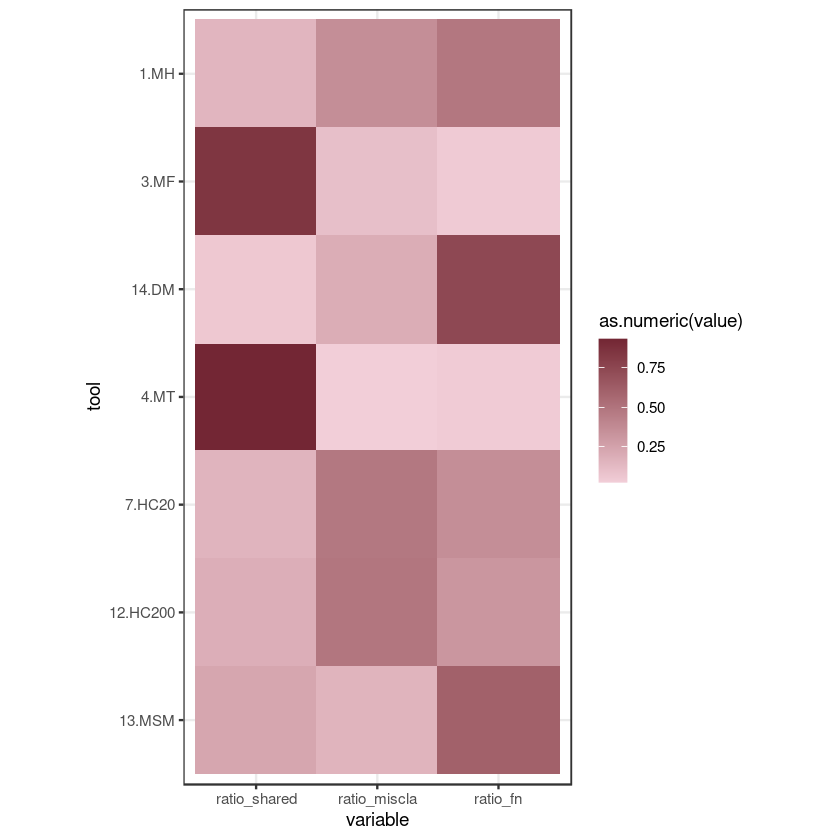

In [12]:
#Miscalssification
data <- read.csv("/data/project/MRS/5.Combined_Analysis/Misclassification/Misclassification.txt",header=FALSE,sep='\t')
data
colnames(data) <- c('tool', 'ans', 'shared_call', 'percent_shared', 'misclassified', 'percent_miscla', 'pair')
data$fn <- data$ans - data$shared_call -data$misclassified
data$ratio_shared <- data$shared_call/data$ans
data$ratio_miscla <- data$misclassified/data$ans
data$ratio_fn <- data$fn/data$ans

data.ratio <- data[c("tool","ratio_shared", "ratio_miscla", "ratio_fn")]
data.ratio

data.ratio.melt <- melt(data.ratio, id = "tool")
data.ratio.melt.mis <- subset(data.ratio.melt, data.ratio.melt$variable == 'ratio_miscla')

data.ratio.melt


data.ratio.melt$tool <- factor(data.ratio.melt$tool,levels=c('13.MSM','12.HC200', '7.HC20', '16.STK', '5.MT_P','17.MT_PD',"4.MT", "14.DM", "3.MF", '2.MH_P',"1.MH"))
p_miscla_snv <- ggplot(data=data.ratio.melt, aes(x=variable, y = tool)) +
geom_tile(aes(fill=as.numeric(value))) + 
    scale_fill_gradient(low = "#F2CED8", high="#732634") + 
theme_bw() + 
theme(aspect.ratio = 2)



p_miscla_snv 